# TASK 2



# QUIN F

In [ ]:
#Setting up

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Loadingdatasets
data_june = pd.read_csv('Test_Data_C_2014_06_30.csv')
data_july = pd.read_csv('Test_Data_C_2014_07_30.csv')
data_august = pd.read_csv('Test_Data_C_2014_08_30.csv')

# Preparation Analyis

In [5]:
# Check the first few rows of the dataset
print(data_june.head())
print(data_july.head())
print(data_august.head())

   Unnamed: 0  ID Dlq_stat      amounts             obs_date  Dlq_days  \
0           1  F1  Current   389.628333  2014-06-30 12:00:00       NaN   
1           2  F2  Current  2446.128333  2014-06-30 12:00:00       NaN   
2           3  F3  Current  2874.366667  2014-06-30 12:00:00       NaN   
3           4  F4  Current   299.626667  2014-06-30 12:00:00       NaN   
4           5  F5  Current   745.455000  2014-06-30 12:00:00       NaN   

          Vertical1        Province1  
0  Home Improvement               ON  
1           Vehicle               AB  
2  Home Improvement               ON  
3  Home Improvement               ON  
4  Home Improvement  Other Provinces  
   Unnamed: 0  ID Dlq_stat      amounts             obs_date  Dlq_days  \
0           1  G1  Current   374.878333  2014-07-30 12:00:00       NaN   
1           2  G2  Current  2850.123333  2014-07-30 12:00:00       NaN   
2           3  G3  Current   288.401667  2014-07-30 12:00:00       NaN   
3           4  G4  Curren

In [6]:
#check for missing values and data types
print(data_june.info())
print(data_july.info())
print(data_august.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13386 entries, 0 to 13385
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13386 non-null  int64  
 1   ID          13386 non-null  object 
 2   Dlq_stat    13386 non-null  object 
 3   amounts     13386 non-null  float64
 4   obs_date    13386 non-null  object 
 5   Dlq_days    105 non-null    float64
 6   Vertical1   13386 non-null  object 
 7   Province1   13386 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 836.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13180 entries, 0 to 13179
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13180 non-null  int64  
 1   ID          13180 non-null  object 
 2   Dlq_stat    13180 non-null  object 
 3   amounts     13180 non-null  float64
 4   obs_date    13180 non-null  object 
 5   Dlq_days    9

# Data Cleaning

In [8]:
#1drop any unnamed or unnecessary columns if present
data_june.drop(columns=[col for col in data_june.columns if 'Unnamed' in col], inplace=True)
print(data_june.isnull().sum())


ID               0
Dlq_stat         0
amounts          0
obs_date         0
Dlq_days     13281
Vertical1        0
Province1        0
dtype: int64


In [9]:
#2 handle Missing Values
#For Dlq_days, fill NaN values with 0 where Dlq_stat is 'Current'

data_june['Dlq_days'].fillna(0, inplace=True)
data_july['Dlq_days'].fillna(0, inplace=True)
data_august['Dlq_days'].fillna(0, inplace=True)

In [10]:
#3check for Unique Values:
#columns like Vertical1 and Province1 should contain expected unique values
#data entry errors can give unexpected variations

print(data_june['Vertical1'].unique())
print(data_june['Province1'].unique())


['Home Improvement' 'Vehicle']
['ON' 'AB' 'Other Provinces' 'BC']


In [14]:
#4Consistent data types(convert ID COLUMN TO INT TYPE)

data_june['ID'] = data_june['ID'].astype(str)
data_july['ID'] = data_july['ID'].astype(str)
data_august['ID'] = data_august['ID'].astype(str)

In [16]:
# Use regex to extract numbers

data_june['ID'] = data_june['ID'].str.extract('(\d+)').astype(int)
data_july['ID'] = data_july['ID'].str.extract('(\d+)').astype(int)
data_august['ID'] = data_august['ID'].str.extract('(\d+)').astype(int)

In [17]:
print(data_june['ID'].dtype)
print(data_july['ID'].dtype)
print(data_august['ID'].dtype)


int64
int64
int64


In [ ]:
#Descriptive statistics

In [18]:
#1 Summary statistics for each dataset

print(data_june.describe())
print(data_july.describe())
print(data_august.describe())

                 ID       amounts      Dlq_days
count  13386.000000  13386.000000  13386.000000
mean    6693.500000   1954.159647      0.204766
std     3864.349687   1792.649704      3.242505
min        1.000000      0.000000      0.000000
25%     3347.250000    857.592083      0.000000
50%     6693.500000   1460.785000      0.000000
75%    10039.750000   2356.990417      0.000000
max    13386.000000  16611.375000     79.000000
          Unnamed: 0            ID       amounts      Dlq_days
count   13180.000000  13180.000000  13180.000000  13180.000000
mean     6640.843703   6590.500000   1941.304601      0.228073
std      4323.453870   3804.882609   1790.083200      3.584100
min         1.000000      1.000000      0.000000      0.000000
25%      3295.750000   3295.750000    846.336667      0.000000
50%      6590.500000   6590.500000   1445.848333      0.000000
75%      9885.250000   9885.250000   2341.036667      0.000000
max    121000.000000  13180.000000  16557.140000    110.000000
 

In [19]:
#2 Frequency distribution of loan status and verticals
print(data_june['Dlq_stat'].value_counts())
print(data_june['Vertical1'].value_counts())

print(data_july['Dlq_stat'].value_counts())
print(data_july['Vertical1'].value_counts())

print(data_august['Dlq_stat'].value_counts())
print(data_august['Vertical1'].value_counts())


Dlq_stat
Current       13272
Delinquent      105
WriteOff          9
Name: count, dtype: int64
Vertical1
Vehicle             7099
Home Improvement    6287
Name: count, dtype: int64
Dlq_stat
Current       13072
Delinquent       94
WriteOff         14
Name: count, dtype: int64
Vertical1
Vehicle             6979
Home Improvement    6201
Name: count, dtype: int64
Dlq_stat
Current       13659
Delinquent      150
WriteOff         20
Name: count, dtype: int64
Vertical1
Home Improvement    6915
Vehicle             6914
Name: count, dtype: int64


In [21]:
#3 delinquency analysis 
#Calculate and print delinquency rates for each month
delinquency_rate_june = data_june[data_june['Dlq_stat'] != 'Current'].shape[0] / data_june.shape[0]
delinquency_rate_july = data_july[data_july['Dlq_stat'] != 'Current'].shape[0] / data_july.shape[0]
delinquency_rate_august = data_august[data_august['Dlq_stat'] != 'Current'].shape[0] / data_august.shape[0]

print(f"June Delinquency Rate: {delinquency_rate_june:.2%}")
print(f"July Delinquency Rate: {delinquency_rate_july:.2%}")
print(f"August Delinquency Rate: {delinquency_rate_august:.2%}")



June Delinquency Rate: 0.85%
July Delinquency Rate: 0.82%
August Delinquency Rate: 1.23%


In [33]:
# Correlation matrix for one of the datasets

print(data_june[['amounts', 'Dlq_days']].corr())

           amounts  Dlq_days
amounts   1.000000  0.024381
Dlq_days  0.024381  1.000000


In [25]:
print(data_june.columns)
print(data_july.columns)
print(data_august.columns)


Index(['ID', 'Dlq_stat', 'amounts', 'obs_date', 'Dlq_days', 'Vertical1',
       'Province1'],
      dtype='object')
Index(['Unnamed: 0', 'ID', 'Dlq_stat', 'amounts', 'obs_date', 'Dlq_days',
       'Vertical1', 'Province1'],
      dtype='object')
Index(['Unnamed: 0', 'ID', 'Dlq_stat', 'amounts', 'obs_date', 'Dlq_days',
       'Vertical1', 'Province1'],
      dtype='object')


# Data Visualization

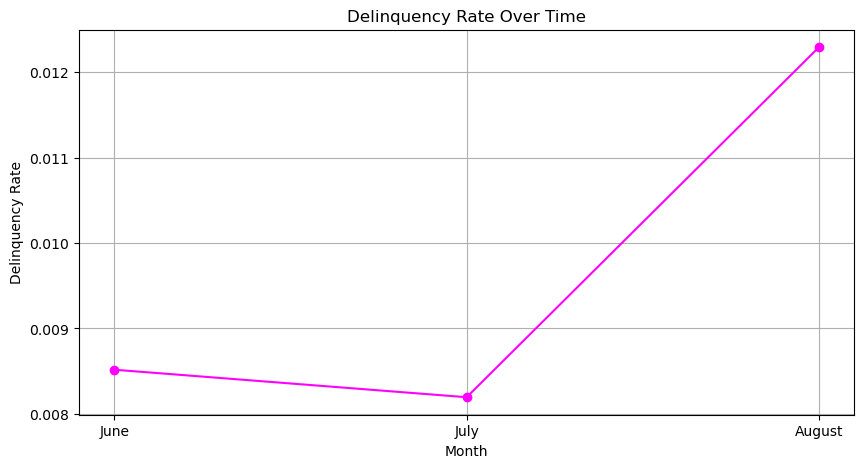

In [35]:
#1Delinquency Rate Over Time
# how the delinquency rate changes over the months can give 
#picture of trends or seasonal effects

#calculated delinquency rates as 
delinquency_rates = [delinquency_rate_june, delinquency_rate_july, delinquency_rate_august]
months = ['June', 'July', 'August']

plt.figure(figsize=(10, 5))
plt.plot(months, delinquency_rates, marker='o', linestyle='-', color='magenta')
plt.title('Delinquency Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Delinquency Rate')
plt.grid(True)
plt.show()

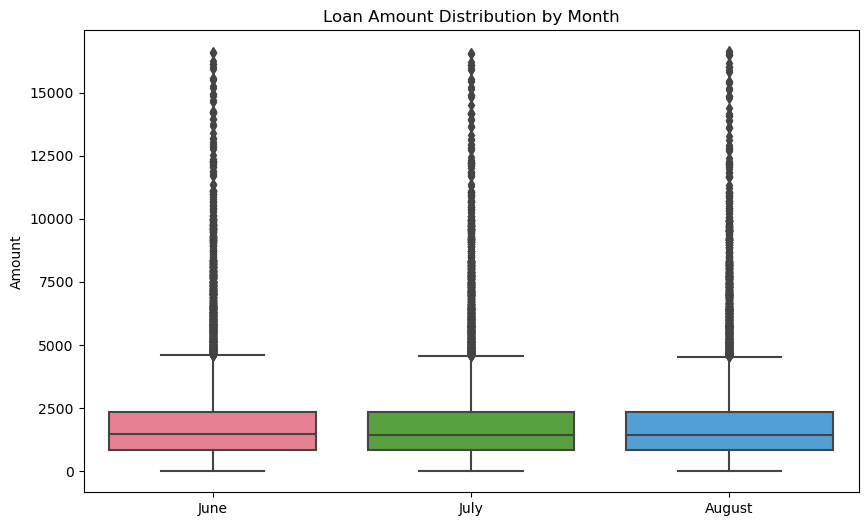

In [36]:
#2. Loan Amount Distribution
#provide insights into the distribution of loan amounts
#helping to identify outliers and the spread of loan amounts
    
# Collect
amounts_data = [data_june['amounts'], data_july['amounts'], data_august['amounts']]

# creating DF for easier plotting w/Seaborn
amounts_df = pd.DataFrame(amounts_data).T  # Transpose to match the required structure
amounts_df.columns = ['June', 'July', 'August']

plt.figure(figsize=(10, 6))
sns.boxplot(data=amounts_df, palette='husl')  # Using the 'husl' palette
plt.title('Loan Amount Distribution by Month')
plt.xticks([0, 1, 2], ['June', 'July', 'August'])
plt.ylabel('Amount')
plt.show()
    

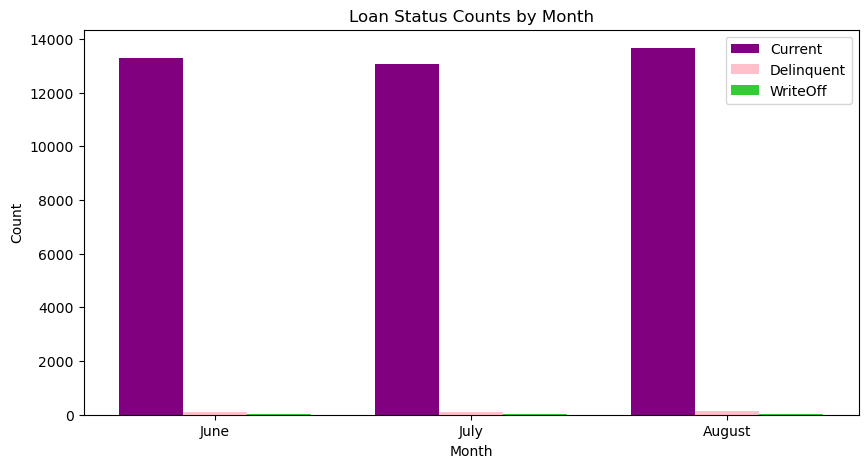

In [41]:
#3Loan Status Counts
#showing the count of loans by their delinquency status 
#each month can illustrate changes in loan health

# Data preparation
months = ['June', 'July', 'August']
statuses = ['Current', 'Delinquent', 'WriteOff']
colors = ['purple', 'pink', 'limegreen'] 

plt.figure(figsize=(10, 5))
bar_width = 0.25
for i, status in enumerate(statuses):
    counts = [data_june['Dlq_stat'].value_counts()[status], 
              data_july['Dlq_stat'].value_counts()[status], 
              data_august['Dlq_stat'].value_counts()[status]]
    plt.bar(np.arange(len(months)) + i * bar_width, counts, color=colors[i], width=bar_width, label=status)

plt.title('Loan Status Counts by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(np.arange(len(months)) + bar_width, months)  #Adjust tick positions to the center of the bars
plt.legend()
plt.show()

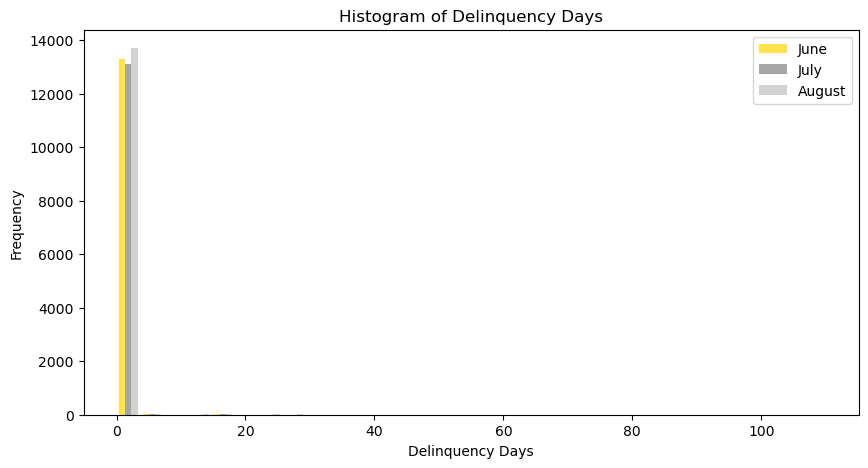

In [44]:
#4Delinquency Days
# histogram help visualize how long loans remain delinquent

plt.figure(figsize=(10, 5))
colors = ['gold', 'gray', 'silver']  
plt.hist([data_june['Dlq_days'].dropna(), data_july['Dlq_days'].dropna(), data_august['Dlq_days'].dropna()], bins=30, color=colors, alpha=0.7, label=['June', 'July', 'August'])
plt.title('Histogram of Delinquency Days')
plt.xlabel('Delinquency Days')
plt.ylabel('Frequency')
plt.legend()
plt.show()


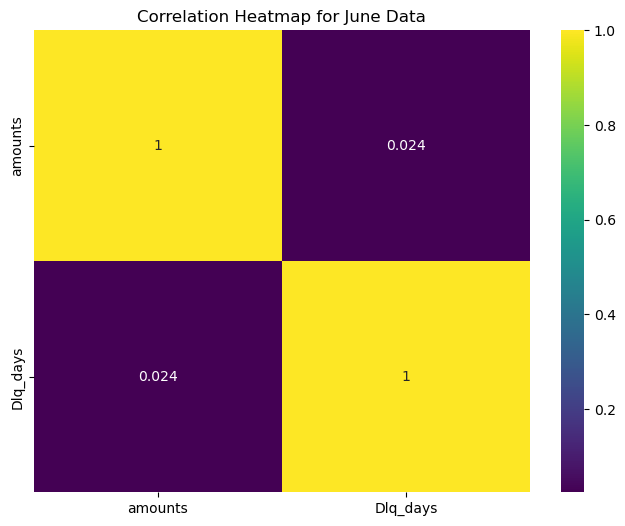

In [45]:
#5Correlation Heatmap
#heatmap to visualize correlations between numerical variables such as 'Amounts' and 'Dlq_days'


plt.figure(figsize=(8, 6))
# Using a vibrant colormap
sns.heatmap(data_june[['amounts', 'Dlq_days']].corr(), annot=True, cmap='viridis')  # 'viridis' is vibrant and perceptually uniform
plt.title('Correlation Heatmap for June Data')
plt.show()


# Presentation

In [ ]:
#please find attach powerpoint